In [ ]:
#Loading our necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans

warnings.filterwarnings('ignore')



In [3]:
#Loading our data
df = pd.read_csv('Mall_Customers.csv')

df.columns = ['ID', 'Gender', 'Age', 'AnnualIncome','SpendingScore']

In [4]:
df.head()

,ID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [5]:
df.describe()

,ID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


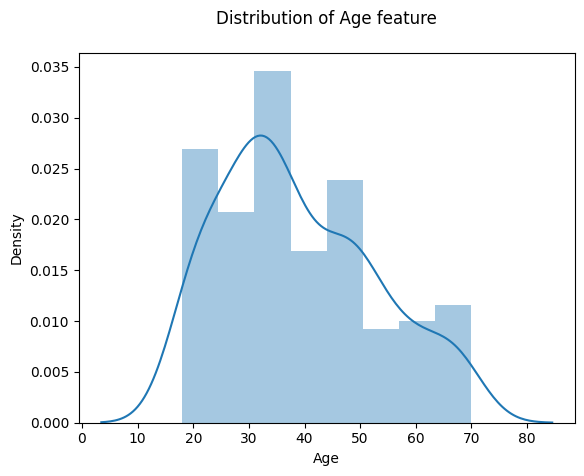

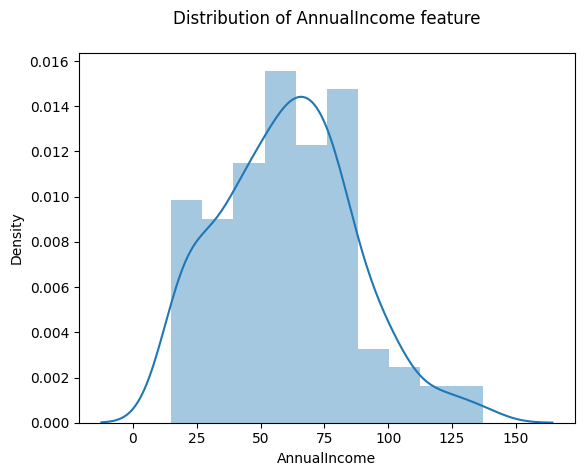

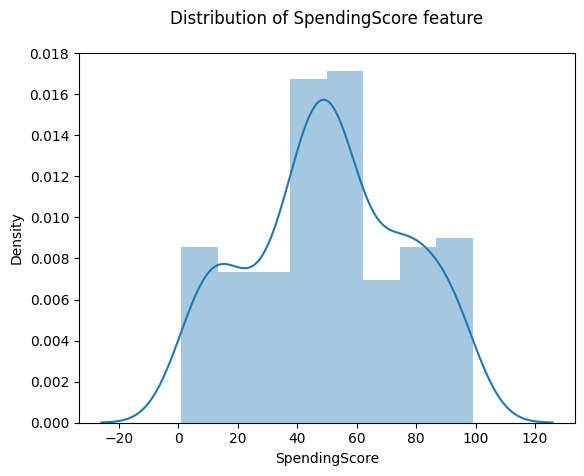

In [6]:
checking_distn = ['Age','AnnualIncome','SpendingScore']

for i in checking_distn:
    plt.figure()
    sns.distplot(df[i])
    plt.title(f'Distribution of {i} feature\n')
    plt.show()

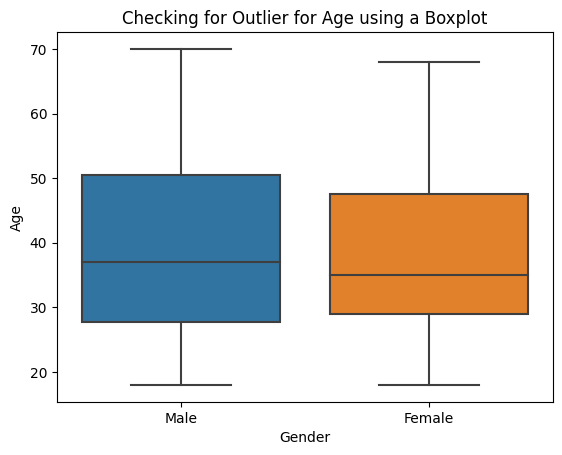

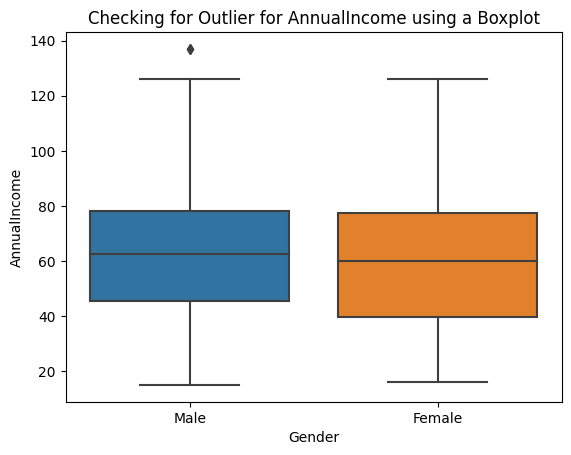

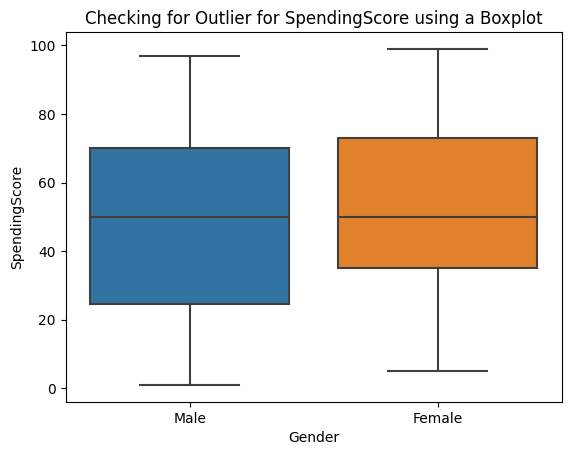

In [7]:
for i in checking_distn:
    plt.figure()
    sns.boxplot(data=df, x='Gender', y= df[i])
    plt.title(f'Checking for Outlier for {i} using a Boxplot')
    plt.show()

In [8]:
df['Gender'].value_counts(normalize = True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64


<h1 style="background-color: black; color: white">Bivariate Analysis</h1>


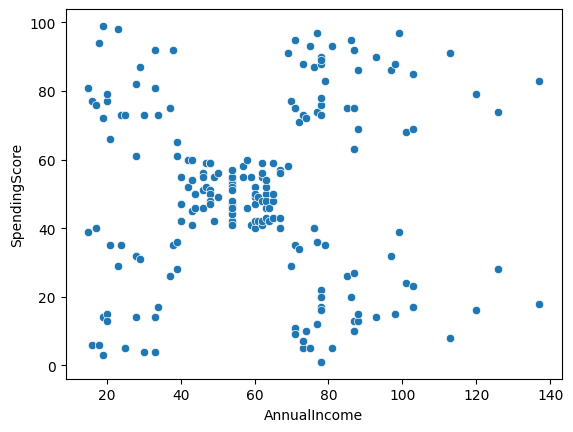

In [9]:
sns.scatterplot(data= df, x = 'AnnualIncome', y = 'SpendingScore')
plt.show()

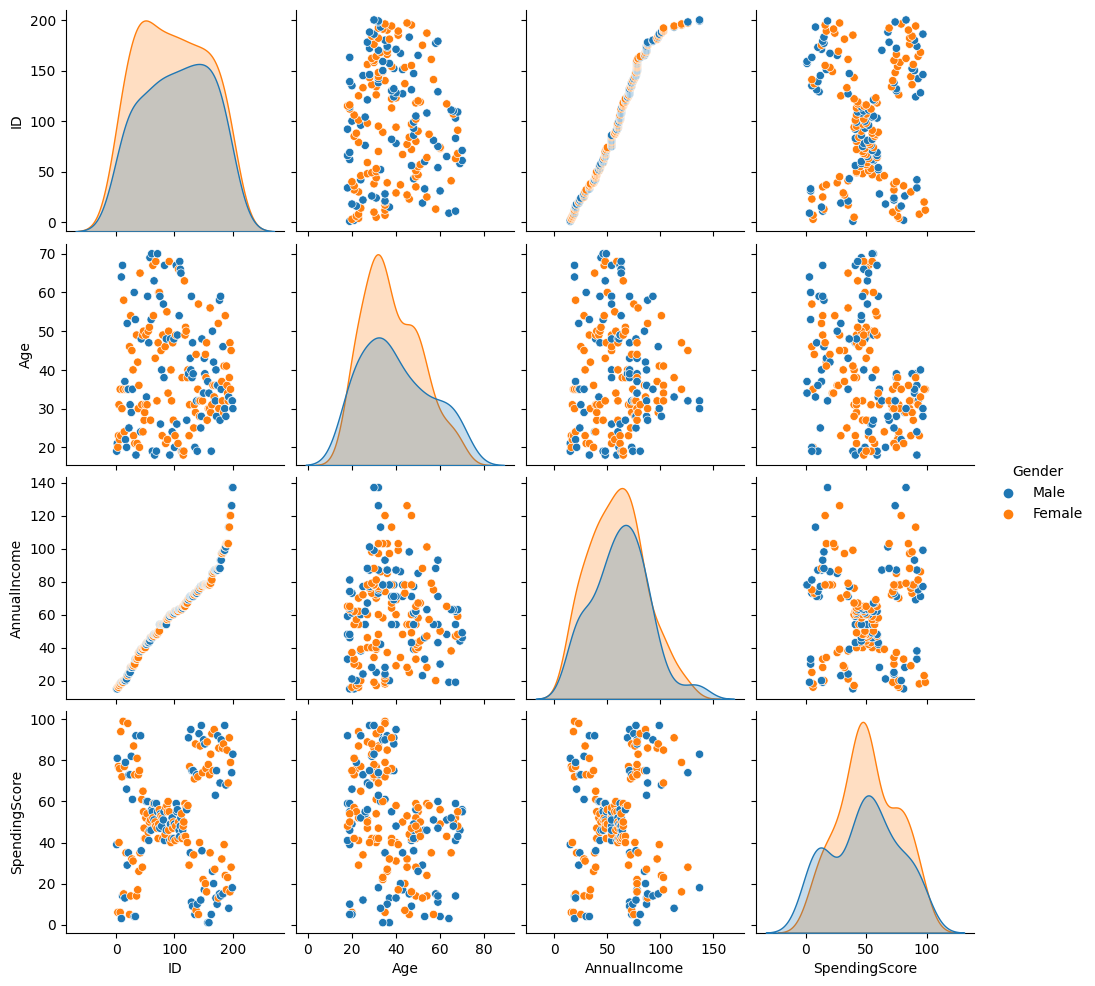

In [10]:
sns.pairplot(df, hue ='Gender')

In [11]:
df.groupby(['Gender'])['Age', 'AnnualIncome', 'SpendingScore'].mean()

,Age,AnnualIncome,SpendingScore
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


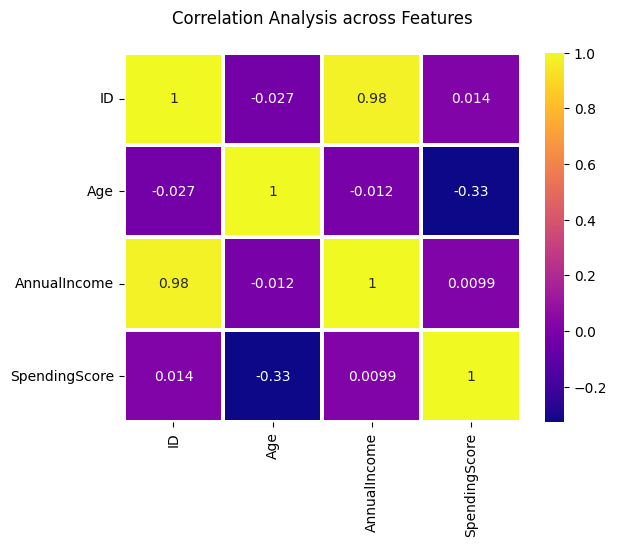

In [12]:
# Checking correlation across teh variables
corr = df.corr()

sns.heatmap(corr, annot = True,
           cmap = 'plasma', linecolor ='white',
           linewidth=1.7)

plt.title('Correlation Analysis across Features\n')
plt.xticks(rotation=90)
plt.show()


<h1 style="background-color: black; color: white">Clustering Analysis using KNN</h1>


In [13]:
clustering1 = KMeans(n_clusters=10) # by default this is 8

clustering1.fit(df[['AnnualIncome']])

KMeans(n_clusters=10)

In [14]:
clustering1.labels_

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3,
       3, 3])

In [15]:
df['IncomeCluster']  = clustering1.labels_

In [16]:
df['IncomeCluster'].value_counts()

5    32
1    28
0    24
6    22
9    22
8    20
2    16
7    16
4    14
3     6
Name: IncomeCluster, dtype: int64

In [17]:
clustering1.inertia_ # Tells the distance beween the centroid


1734.167748917749

In [18]:
df.groupby('IncomeCluster')['Age','AnnualIncome','SpendingScore'].mean()

,Age,AnnualIncome,SpendingScore
IncomeCluster,,,
0,35.583333,77.750000,51.291667
1,46.035714,50.428571,50.892857
2,37.312500,30.000000,46.437500
3,36.833333,127.666667,49.666667
4,36.500000,102.000000,53.000000
5,41.000000,61.500000,49.000000
6,33.318182,19.272727,51.227273
7,39.375000,87.625000,48.937500
8,41.150000,40.500000,50.600000


In [19]:
clustering2 = KMeans()
clustering2.fit(df[['AnnualIncome', 'SpendingScore']])

df['SpeningandIncomeCluster'] = clustering2.labels_

df.head()

,ID,Gender,Age,AnnualIncome,SpendingScore,IncomeCluster,SpeningandIncomeCluster
0,1,Male,19,15,39,6,7
1,2,Male,21,15,81,6,3
2,3,Female,20,16,6,6,7
3,4,Female,23,16,77,6,3
4,5,Female,31,17,40,6,7


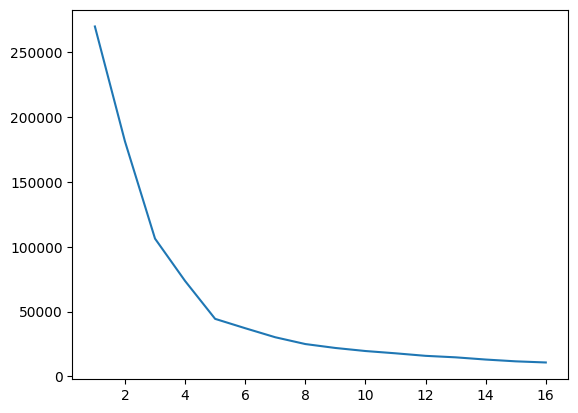

In [20]:
inertia_score  = []

for i in range(1,17):
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(df[['AnnualIncome','SpendingScore']])
    inertia_score.append(kmeans.inertia_)

    
plt.plot(range(1,17),inertia_score)
plt.show()

In [29]:
sns.scatterplot(data =df, x='AnnualIncome', y='SpendingScore',hue='SpeningandIncomeCluster')

ValueError: Could not interpret value `SpendingandIncomeCluster` for parameter `hue`

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       200 non-null    int64   
 1   Gender                   200 non-null    object  
 2   Age                      200 non-null    int64   
 3   AnnualIncome             200 non-null    int64   
 4   SpendingScore            200 non-null    int64   
 5   IncomeCluster            200 non-null    int32   
 6   SpeningandIncomeCluster  200 non-null    category
dtypes: category(1), int32(1), int64(4), object(1)
memory usage: 9.3+ KB


In [26]:
df['SpeningandIncomeCluster'] = df['SpeningandIncomeCluster'].astype('category')